# **Time Series Forecasting Models**

In [1]:
# 📊 Import necessary libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import os  
import sys

In [2]:
# 🛠️ Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
# 📚 Importing the DataPreprocessor class from the scripts directory
from data_preprocessing import DataPreprocessor 

In [4]:
# 🛠️ Create an instance of DataPreprocessor
processor = DataPreprocessor()

In [5]:
tsla_data = processor.load_data('TSLA')

📊 Loading data for TSLA from '../data/TSLA.csv'.


In [6]:
# 📚 Importing the DataPreprocessor class from the scripts directory
from time_series_forecasting import TimeSeriesModelTrainer

In [7]:
# 🛠️ Create an instance of DataPreprocessor
processor = DataPreprocessor()
model_trainer = TimeSeriesModelTrainer(tsla_data)

In [8]:
model_trainer.prepare_data()

Data split: 2946 train, 737 test


### **Train the ARIMA Model**

In [9]:
# Train the ARIMA Model
model_trainer.train_arima()

Training ARIMA model


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17969.142, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17973.636, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17974.957, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17974.949, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17975.363, Time=0.06 sec


ARIMA model trained with parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (0, 1, 0), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (0, 0, 0, 0), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': False}


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17972.956, Time=0.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.757 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2946
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8988.682
Date:                Sun, 02 Mar 2025   AIC                         -17975.363
Time:                        21:47:39   BIC                         -17969.375
Sample:                             0   HQIC                        -17973.207
                               - 2946                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   9.72e-07    134.521      0.000       0.00

### **Train the SARIMA Model**

In [10]:
model_trainer.train_sarima()

Training SARIMA model


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-15837.534, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-16706.243, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=1.30 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-15851.529, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-17081.849, Time=0.86 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=2.09 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-17077.720, Time=0.45 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-17079.855, Time=1.52 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-17079.844, Time=0.81 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-17081.817, Time=0.55 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-17077.856, Time=1.29 sec


SARIMA model trained with parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 0), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (2, 1, 0, 5), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': False}


 ARIMA(1,1,0)(2,1,0)[5] intercept   : AIC=-17079.854, Time=1.81 sec

Best model:  ARIMA(1,1,0)(2,1,0)[5]          
Total fit time: 13.617 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2946
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 5)   Log Likelihood                8544.924
Date:                           Sun, 02 Mar 2025   AIC                         -17081.849
Time:                                   21:50:05   BIC                         -17057.904
Sample:                                        0   HQIC                        -17073.227
                                          - 2946                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

### **Train the LSTM Model**

Training LSTM model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
82/82 [==============================] - 

LSTM model training completed


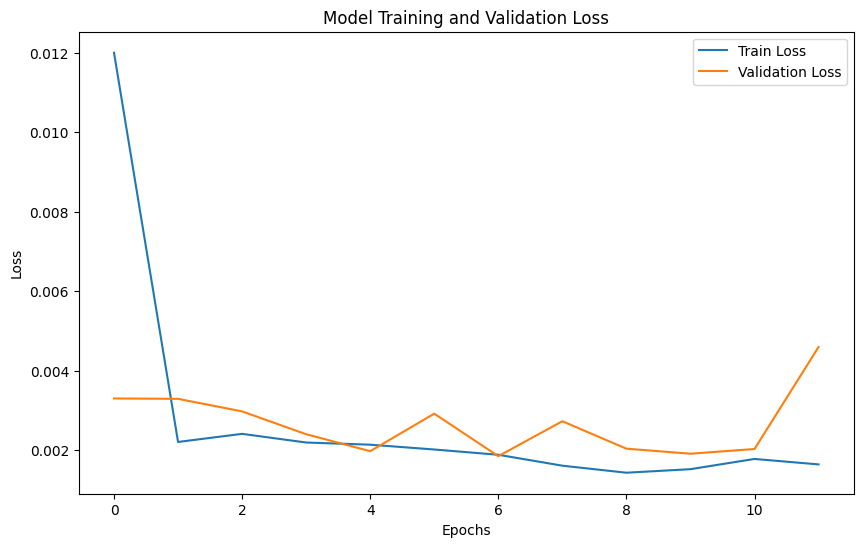

Training history plotted successfully


In [11]:
model_trainer.train_lstm()

### **Make Predictions**

In [12]:
model_trainer.make_prediction()

1/1 [==============================] - 0s 17ms/step


Predictions generated for all models


### **Model Evaluation**

In [13]:
model_trainer.evaluate_model()

ARIMA - MAE: 0.23, RMSE: 0.28, MAPE: 36.05%
SARIMA - MAE: 1.57, RMSE: 1.84, MAPE: 287.03%
LSTM - MAE: 0.15, RMSE: 0.21, MAPE: 22.11%



Model Evaluation Metrics:
     Model       MAE      RMSE        MAPE
0   ARIMA  0.226258  0.280315   36.047056
1  SARIMA  1.574780  1.844147  287.032290
2    LSTM  0.147336  0.210378   22.111633


### **Compare the Model**

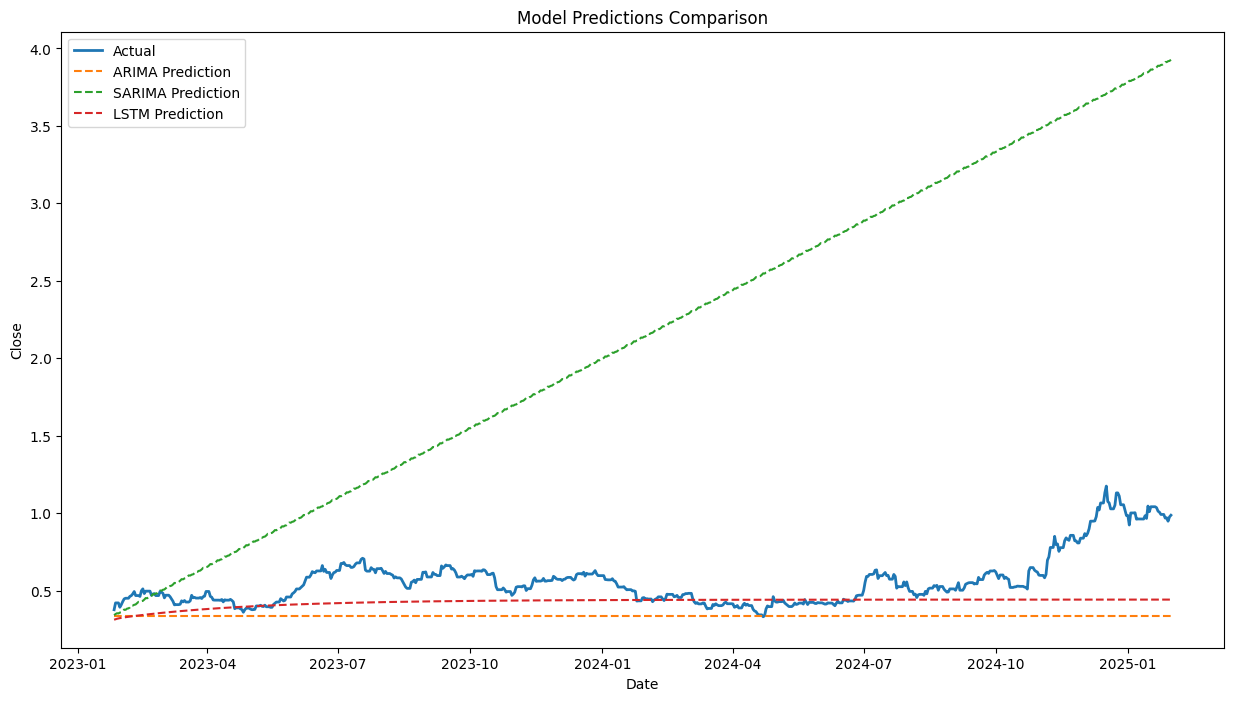

Results plotted successfully


In [14]:
model_trainer.plot_result()

### **Save the best model for future forecasting**

In [15]:
model_trainer.save_best_model(model_name='ARIMA')
model_trainer.save_best_model(model_name='LSTM')

LSTM model saved successfully.
ARIMA model saved successfully.
